In [1]:
import math
import pandas as pd
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing

In [2]:
data_dir = "./output/"
rna_path = data_dir + "model6_rna.tsv"
dna_path = data_dir + "model7_dna.tsv"
merge_path = data_dir + "model7_merge.tsv"

colnames = ["names"]
dim = 15
for i in range(1, dim+1):
    colnames.append("dim"+str(i))
colnames[-5:]

['dim11', 'dim12', 'dim13', 'dim14', 'dim15']

In [3]:
def prep(path, header=None, sep="\t"):
    df = pd.read_csv(path, header=None, sep="\t")
    df.columns = colnames
    df = df.set_index('names')
    return df

def getCells(df):
    return df[df.index.str.startswith("#")]

def check_sanity(df):
    print("shape of data is", df.shape)
    missing_vals = df.isnull().sum() != 0
    print("columns that have missing values include", df.columns[missing_vals])

In [4]:
rna_df = prep(rna_path)
rna_cell_df = getCells(rna_df)
dna_df = prep(dna_path)
dna_cell_df = getCells(dna_df)
merge_df = prep(merge_path)
merge_cell_df = getCells(merge_df)
for df in (rna_df, dna_df, merge_df):
    check_sanity(df)
for df in (rna_cell_df, dna_cell_df, merge_cell_df):
    check_sanity(df)

shape of data is (35707, 15)
columns that have missing values include Index([], dtype='object')
shape of data is (75845, 15)
columns that have missing values include Index([], dtype='object')
shape of data is (101244, 15)
columns that have missing values include Index([], dtype='object')
shape of data is (10309, 15)
columns that have missing values include Index([], dtype='object')
shape of data is (10309, 15)
columns that have missing values include Index([], dtype='object')
shape of data is (10310, 15)
columns that have missing values include Index([], dtype='object')


In [5]:
import pyreadr
from sklearn.preprocessing import LabelEncoder

In [6]:
meta = pyreadr.read_r("./data/AdBrainCortex_SNAREseq_metadata.rds")[None]
meta["id"] = "#" + meta["Batch"].astype(str) + "_" + meta["Barcode"].astype(str)
meta = meta.set_index("id")

le = LabelEncoder()
meta["label"] = le.fit_transform(meta["Ident"])

print(meta.shape)
meta.head()

(10309, 4)


Batch       Barcode       Ident  label
id                                                      
#09A_CAGCCCCGCCTT   09A  CAGCCCCGCCTT      E3Rorb      4
#09A_CGCCTACCATGA   09A  CGCCTACCATGA     E5Parm1      8
#09A_GATGCGCGGCTA   09A  GATGCGCGGCTA         Ast      0
#09A_GGTCCGAGTCCT   09A  GGTCCGAGTCCT  E4Il1rapl2      5
#09A_TCTCCCGGCACC   09A  TCTCCCGGCACC     E5Parm1      8

In [9]:
le.classes_

array(['Ast', 'Clau', 'E2Rasgrf2', 'E3Rmst', 'E3Rorb', 'E4Il1rapl2',
       'E4Thsd7a', 'E5Galnt14', 'E5Parm1', 'E5Sulf1', 'E5Tshz2', 'E6Tle4',
       'Endo', 'InN', 'InP', 'InS', 'InV', 'Mic', 'Mis', 'OPC', 'OliI',
       'OliM', 'Peri'], dtype=object)

In [7]:
print("total number of classes:", len(meta["label"].unique()))

rna_cell_df2 = rna_cell_df.join(meta)
rna_cell_df2 = rna_cell_df2.sort_values(by='label')
print("number of classes in RNA data", len(rna_cell_df2["label"].unique()))

dna_cell_df2 = dna_cell_df.join(meta)
dna_cell_df2 = dna_cell_df2.dropna()
dna_cell_df2["label"] = dna_cell_df2["label"].astype(int)
dna_cell_df2 = dna_cell_df2.sort_values(by='label')
print("number of classes in DNA data",len(dna_cell_df2["label"].unique()))

merge_cell_df2 = merge_cell_df.join(meta)
merge_cell_df2 = merge_cell_df2.dropna()
merge_cell_df2["label"] = merge_cell_df2["label"].astype(int)
merge_cell_df2 = merge_cell_df2.sort_values(by='label')
print("number of classes in combined data",len(merge_cell_df2["label"].unique()))

total number of classes: 23
number of classes in RNA data 23
number of classes in DNA data 23
number of classes in combined data 23


In [11]:
merge_cell_df2.head()

dim1      dim2      dim3      dim4      dim5      dim6  \
names                                                                           
#09A_GATGCGCGGCTA -0.000005 -0.000017 -0.000006  0.000014  0.000044 -0.000014   
#09F_TACAAGTTCCCT  0.000793  0.001595 -0.000587  0.001871  0.002630 -0.001378   
#09L_GACGACTTTGCG -0.001914  0.001367  0.000802  0.005380  0.006413 -0.002140   
#09L_GAAGTGCATGGT -0.000005 -0.000012  0.000002  0.000002  0.000024  0.000007   
#09D_AGCTGACGGTTA -0.000685  0.001154  0.000017  0.001736  0.002849 -0.001265   

                       dim7      dim8      dim9     dim10     dim11     dim12  \
names                                                                           
#09A_GATGCGCGGCTA -0.000010  0.000055  0.000006 -0.000072 -0.000039  0.000040   
#09F_TACAAGTTCCCT -0.002392  0.006397 -0.000589 -0.005218 -0.001274  0.002562   
#09L_GACGACTTTGCG -0.004702  0.016977 -0.000675 -0.013085 -0.004085  0.005064   
#09L_GAAGTGCATGGT -0.000013  0.000044 -0.000001 -0.000029 -0.000007  0.000009   
#09D_AGCTGACGGTTA -0.002074  0.005891  0.001412 -0.005442 -0.001870  0.003033   

                      dim13     dim14     dim15 Batch       Barcode Ident  \
names                                                                       
#09A_GATGCGCGGCTA -0.000024  0.000100  0.000008   09A  GATGCGCGGCTA   Ast   
#09F_TACAAGTTCCCT  0.000747  0.009278  0.000108   09F  TACAAGTTCCCT   Ast   
#09L_GACGACTTTGCG -0.002866  0.027125  0.002479   09L  GACGACTTTGCG   Ast   
#09L_GAAGTGCATGGT -0.000003  0.000062  0.000001   09L  GAAGTGCATGGT   Ast   
#09D_AGCTGACGGTTA  0.000991  0.010338 -0.001515   09D  AGCTGACGGTTA   Ast   

                   label  
names                     
#09A_GATGCGCGGCTA      0  
#09F_TACAAGTTCCCT      0  
#09L_GACGACTTTGCG      0  
#09L_GAAGTGCATGGT      0  
#09D_AGCTGACGGTTA      0

# Clustering

In [20]:
import phenograph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

The rule of thumb is:  
- Use ARI when the ground truth clustering has large equal sized clusters  
- Usa AMI when the ground truth clustering is unbalanced and there exist small clusters  

In [14]:
# scaler = StandardScaler()
# rna_cell_scaled2 = scaler.fit_transform(rna_cell_df2.iloc[:, :-4])
# dna_cell_scaled2 = scaler.fit_transform(dna_cell_df2.iloc[:, :-4])
# merge_cell_scaled2 = scaler.fit_transform(merge_cell_df2.iloc[:, :-4])

In [21]:
def getConfMat(df, community):
    print("The AMI score is", adjusted_mutual_info_score(df.Ident, community))
    conf_mat = pd.crosstab(df.Ident, community)
    conf_mat = conf_mat.div(conf_mat.sum(axis=1), axis=0)
    return conf_mat

def plotConfMat(conf_mat, figsize=(15,5), title="", fontsize=20, xlabel="Cluster"):
    f, ax = plt.subplots(figsize=figsize)
    sns.heatmap(conf_mat, ax=ax, annot=True, cbar=False, cmap=sns.diverging_palette(240,10,as_cmap=True), 
                     fmt='.1%', vmax=1)
    cbar = ax.figure.colorbar(ax.collections[0])
    cbar.set_ticks([0, .25, .5, 0.75, 1.])
    cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel(xlabel)

## Kmeans

In [31]:
from sklearn.cluster import KMeans
kmeans23 = KMeans(n_clusters=23)
y_kmeans_rna = kmeans23.fit_predict(rna_cell_scaled2)
y_kmeans_dna = kmeans23.fit_predict(dna_cell_scaled2)
y_kmeans_merge = kmeans23.fit_predict(merge_cell_scaled2)

The AMI score is 0.21517648583876572


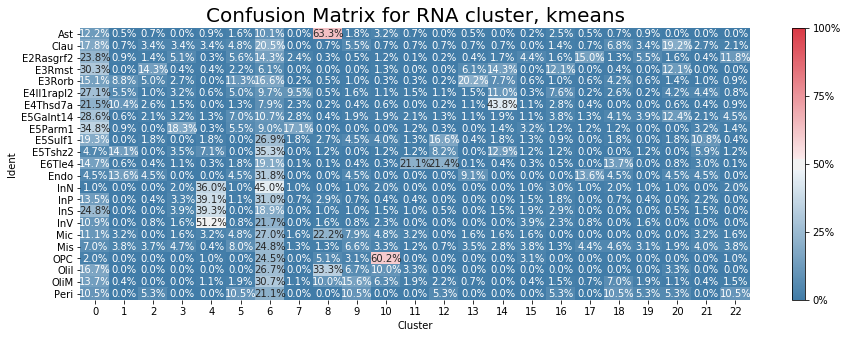

In [29]:
conf_mat_kmeans_rna = getConfMat(rna_cell_df2, y_kmeans_rna)
plotConfMat(conf_mat_kmeans_rna, title="Confusion Matrix for RNA cluster, kmeans")

The AMI score is 0.05550035556853743


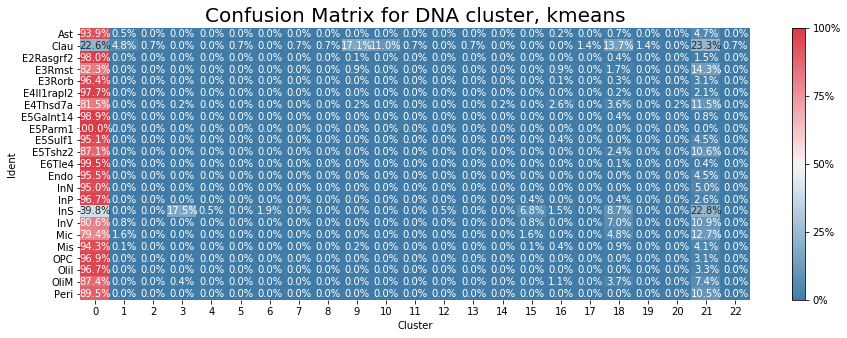

In [32]:
conf_mat_kmeans_dna = getConfMat(dna_cell_df2, y_kmeans_dna)
plotConfMat(conf_mat_kmeans_dna, title="Confusion Matrix for DNA cluster, kmeans")

## Phenograph

In [19]:
def phenographInfo(arr):
    print("data size", arr.shape)
    print("different clusters and their sizes", np.unique(arr, return_counts=True))

In [39]:
# def evalCluster(ytrue, ycluster, sort=True):
#     group_df = pd.concat([ytrue.Ident.reset_index(drop=True), pd.Series(ycluster)], axis=1, ignore_index=True)
#     group_df.columns = ['true_label', 'cluster']
#     group_res = group_df.groupby(['true_label','cluster'])\
#         .agg({'cluster': ['count']})
#     if not sort:
#         return group_res
#     group_sort = group_res.reset_index().sort_values(['true_label',('cluster', 'count')], ascending=[True, False])
#     with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#         print(group_sort)
#     return group_sort

In [22]:
communities_rna, graph_rna, Q_rna = phenograph.cluster(data=rna_cell_df2.iloc[:, :-4], k=30, primary_metric='cosine')
phenographInfo(communities_rna)

Finding 30 nearest neighbors using cosine metric and 'brute' algorithm
Neighbors computed in 5.2867512702941895 seconds
Jaccard graph constructed in 7.454361200332642 seconds
Wrote graph to binary file in 1.3914587497711182 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.634634
After 2 runs, maximum modularity is Q = 0.635856
After 14 runs, maximum modularity is Q = 0.638893
After 31 runs, maximum modularity is Q = 0.641175
Louvain completed 51 runs in 44.87977409362793 seconds
Sorting communities by size, please wait ...
PhenoGraph complete in 60.95968246459961 seconds
data size (10309,)
different clusters and their sizes (array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([1722, 1533, 1532, 1210, 1207, 1083,  889,  717,  416], dtype=int64))


The AMI score is 0.3509354715010005


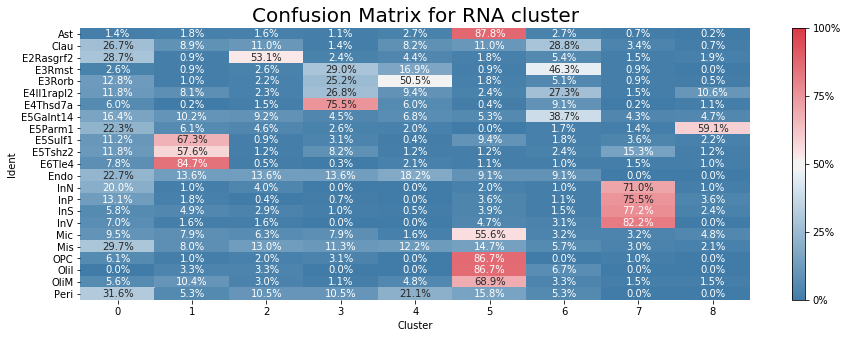

In [23]:
conf_mat_rna = getConfMat(rna_cell_df2, communities_rna)
plotConfMat(conf_mat_rna, title="Confusion Matrix for RNA cluster")

In [24]:
communities_dna, graph_dna, Q_dna = phenograph.cluster(data=dna_cell_df2.iloc[:, :-4], k=30, primary_metric='cosine')
phenographInfo(communities_dna)

Finding 30 nearest neighbors using cosine metric and 'brute' algorithm
Neighbors computed in 4.93500542640686 seconds
Jaccard graph constructed in 6.086949348449707 seconds
Wrote graph to binary file in 1.2406859397888184 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.727973
After 2 runs, maximum modularity is Q = 0.731016
After 3 runs, maximum modularity is Q = 0.732256
Louvain completed 23 runs in 14.62161898612976 seconds
Sorting communities by size, please wait ...
PhenoGraph complete in 28.73241949081421 seconds
data size (10308,)
different clusters and their sizes (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([2485, 2274, 1437, 1381,  633,  528,  452,  409,  346,  221,  142],
      dtype=int64))


The AMI score is 0.5424460264979932


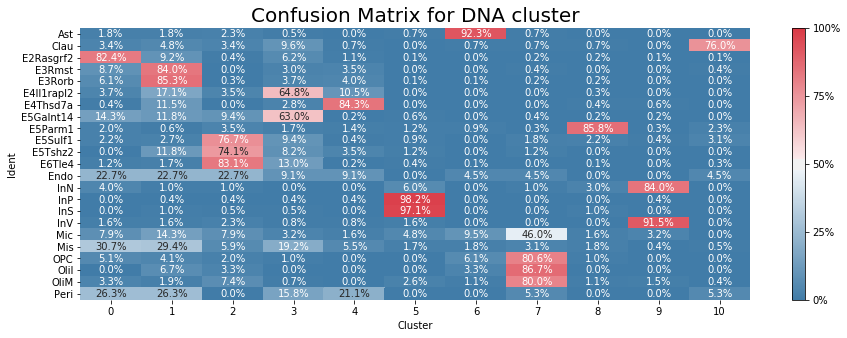

In [25]:
conf_mat_dna = getConfMat(dna_cell_df2, communities_dna)
plotConfMat(conf_mat_dna, title="Confusion Matrix for DNA cluster")

In [26]:
communities_merge, graph_merge, Q_merge = phenograph.cluster(data=merge_cell_df2.iloc[:, :-4], k=30, primary_metric='cosine')
phenographInfo(communities_merge)

Finding 30 nearest neighbors using cosine metric and 'brute' algorithm
Neighbors computed in 5.752335548400879 seconds
Jaccard graph constructed in 6.28947639465332 seconds
Wrote graph to binary file in 1.5525364875793457 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.753217
Louvain completed 21 runs in 11.178667783737183 seconds
Sorting communities by size, please wait ...
PhenoGraph complete in 26.41869831085205 seconds
data size (10309,)
different clusters and their sizes (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([2727, 2087, 1551, 1330,  520,  499,  480,  417,  367,  203,  128],
      dtype=int64))


The AMI score is 0.6127091501838713


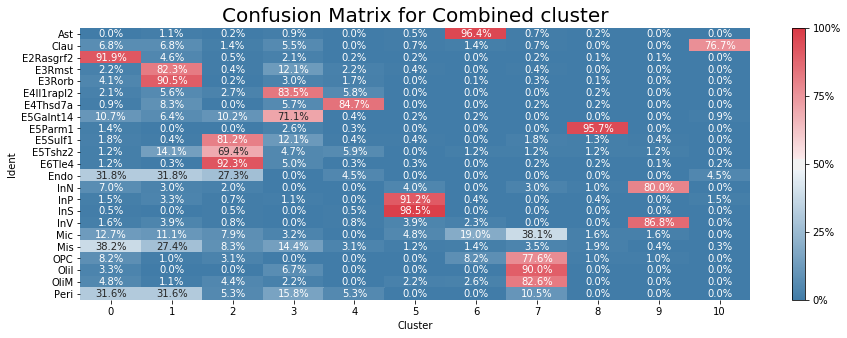

In [27]:
conf_mat_merge = getConfMat(merge_cell_df2, communities_merge)
plotConfMat(conf_mat_merge, title="Confusion Matrix for Combined cluster")

# 2D Visualization

In [8]:
import umap
from sklearn.manifold import TSNE

In [15]:
rna_umap2 = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=2, metric='cosine').fit_transform(rna_cell_df2.iloc[:, :-4])
dna_umap2 = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=2, metric='cosine').fit_transform(dna_cell_df2.iloc[:, :-4])
merge_umap2 = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=2, metric='cosine').fit_transform(merge_cell_df2.iloc[:, :-4])

In [28]:
rna_umap3 = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=3, metric='cosine').fit_transform(rna_cell_df2.iloc[:, :-4])
dna_umap3 = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=3, metric='cosine').fit_transform(dna_cell_df2.iloc[:, :-4])
merge_umap3 = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=3, metric='cosine').fit_transform(merge_cell_df2.iloc[:, :-4])

In [66]:
# rna_tsne = TSNE(n_components=2, metric='cosine').fit_transform(rna_cell_df2.iloc[:, :-4])
# dna_tsne = TSNE(n_components=2, metric='cosine').fit_transform(dna_cell_df2.iloc[:, :-4])
# merge_tsne = TSNE(n_components=2, metric='cosine').fit_transform(merge_cell_df2.iloc[:, :-4])

In [10]:
color24 = ["#000000", "#737373", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#FFD400", "#A30059",
        "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
        "#5A0007", "#809693", "#0089A3", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF0000"]

In [17]:
all_classes = ['Ast', 'Clau', 'E2Rasgrf2', 'E3Rmst', 'E3Rorb', 'E4Il1rapl2',
       'E4Thsd7a', 'E5Galnt14', 'E5Parm1', 'E5Sulf1', 'E5Tshz2', 'E6Tle4',
       'Endo', 'InN', 'InP', 'InS', 'InV', 'Mic', 'Mis', 'OPC', 'OliI',
       'OliM', 'Peri']
def vis2d(ax, x, y, label_num, labels=all_classes, alpha=0.7, s=10, title="visualization", xlab="x", ylab="y", vis=False, legend=True):
    points = ax.scatter(x, y, c=label_num, label=label_num, edgecolor='none', 
                        alpha=alpha, s=s, cmap=matplotlib.colors.ListedColormap(color24))
    ax.spines["top"].set_visible(vis)
    ax.spines["right"].set_visible(vis)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title, fontsize=15)

    if legend:
        #   *points.legend_elements()
        ax.legend(handles=points.legend_elements(num=len(all_classes))[0], labels=labels, 
                  title="Classes", loc='center left', bbox_to_anchor=(1, 0.5))    

def vis2d_label(ax, df, labels=all_classes, alpha=0.4, s=10, title="visualization", xlab="x", ylab="y", vis=False, legend=True, annot=True):
    length = len(labels)
    for i, label in enumerate(labels):
        ax.scatter(x=df.loc[df['classes'] == label, 'umap1'], y=df.loc[df['classes'] == label, 'umap2'], 
                   color=color24[i], edgecolor='none', alpha=alpha, s=s)
        if annot:
            ax.annotate(i, df.loc[df['classes']==label,['umap1','umap2']].median(),
                     horizontalalignment='center',verticalalignment='center',
                     size=12, weight='bold', color='white', backgroundcolor=color24[i])
        
    ax.spines["top"].set_visible(vis)
    ax.spines["right"].set_visible(vis)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title, fontsize=15)
    if legend:
        labels_copy = []
        if labels == all_classes:
            labels_copy = []
            for i in range(length):
                labels_copy.append(str(i) + " " + labels[i])
        ax.legend(labels_copy, title="Classes", loc='center left', bbox_to_anchor=(1, 0.5), ncol=math.ceil(length/6))

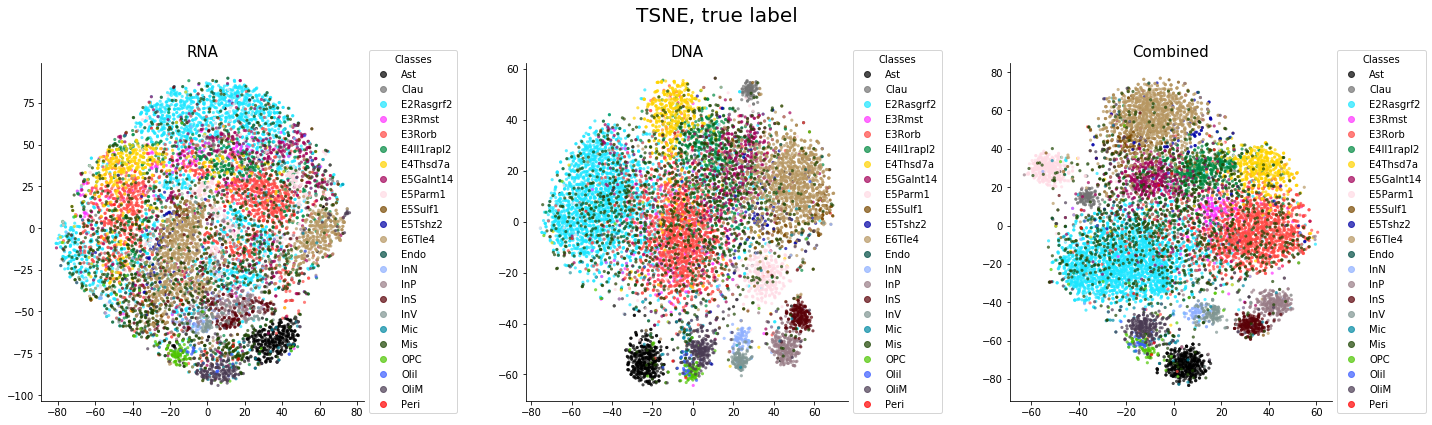

In [67]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle("TSNE, true label", fontsize=20)
ax1 = axes[0]
vis2d(ax1, rna_tsne, rna_cell_df2["label"], title="RNA")
ax2 = axes[1]
vis2d(ax2, dna_tsne, dna_cell_df2["label"], title="DNA")
ax3 = axes[2]
vis2d(ax3, merge_tsne, merge_cell_df2["label"], title="Combined")
fig.tight_layout()
fig.subplots_adjust(top=0.85, wspace=0.5)

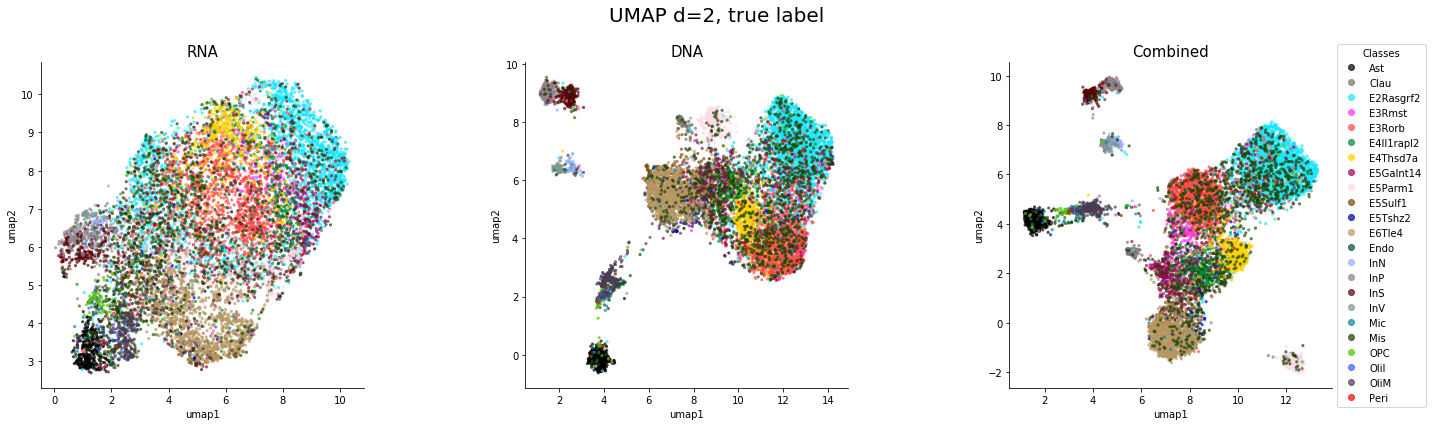

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("UMAP d=2, true label", fontsize=20)
vis2d(axes[0], rna_umap2[:,0], rna_umap2[:,1], rna_cell_df2["label"], title="RNA", xlab="umap1", ylab="umap2", legend=False)
vis2d(axes[1], dna_umap2[:,0], dna_umap2[:,1], dna_cell_df2["label"], title="DNA", xlab="umap1", ylab="umap2", legend=False)
vis2d(axes[2], merge_umap2[:,0], merge_umap2[:,1], merge_cell_df2["label"], title="Combined", xlab="umap1", ylab="umap2")
fig.tight_layout()
fig.subplots_adjust(top=0.85, wspace=0.5)

In [13]:
def umap_concat(umap_arr, cell_df, true_label=True):
    df = pd.concat([pd.DataFrame(umap_arr), cell_df.label.reset_index().label], axis=1)
    df.columns = ['umap1', 'umap2', 'label']
    if true_label:
        df["classes"] = le.inverse_transform(df.label)
    else:
        df["classes"] = df.label
    return df

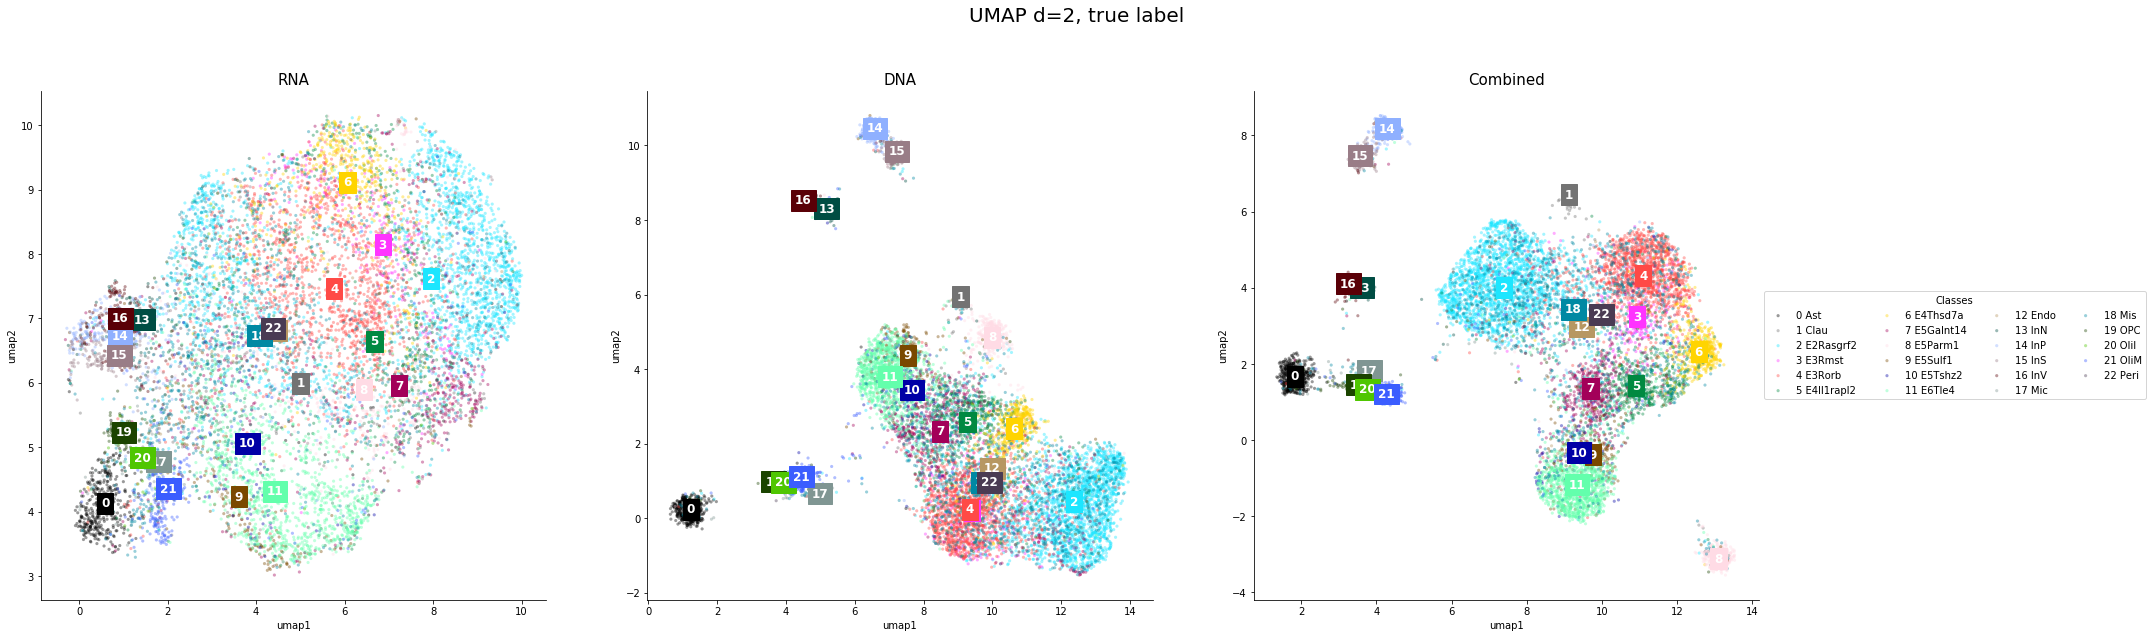

In [30]:
rna_umap2_concat = umap_concat(rna_umap2, rna_cell_df2)
dna_umap2_concat = umap_concat(dna_umap2, dna_cell_df2)
merge_umap2_concat = umap_concat(merge_umap2, merge_cell_df2)

fig, axes = plt.subplots(1, 3, figsize=(30, 9))
fig.suptitle("UMAP d=2, true label, adult", fontsize=20)
vis2d_label(axes[0], rna_umap2_concat, title="RNA", xlab="umap1", ylab="umap2", legend=False)
vis2d_label(axes[1], dna_umap2_concat, title="DNA", xlab="umap1", ylab="umap2", legend=False)
vis2d_label(axes[2], merge_umap2_concat, title="Combined", xlab="umap1", ylab="umap2")
fig.tight_layout()
fig.subplots_adjust(top=0.85, wspace=0.2)

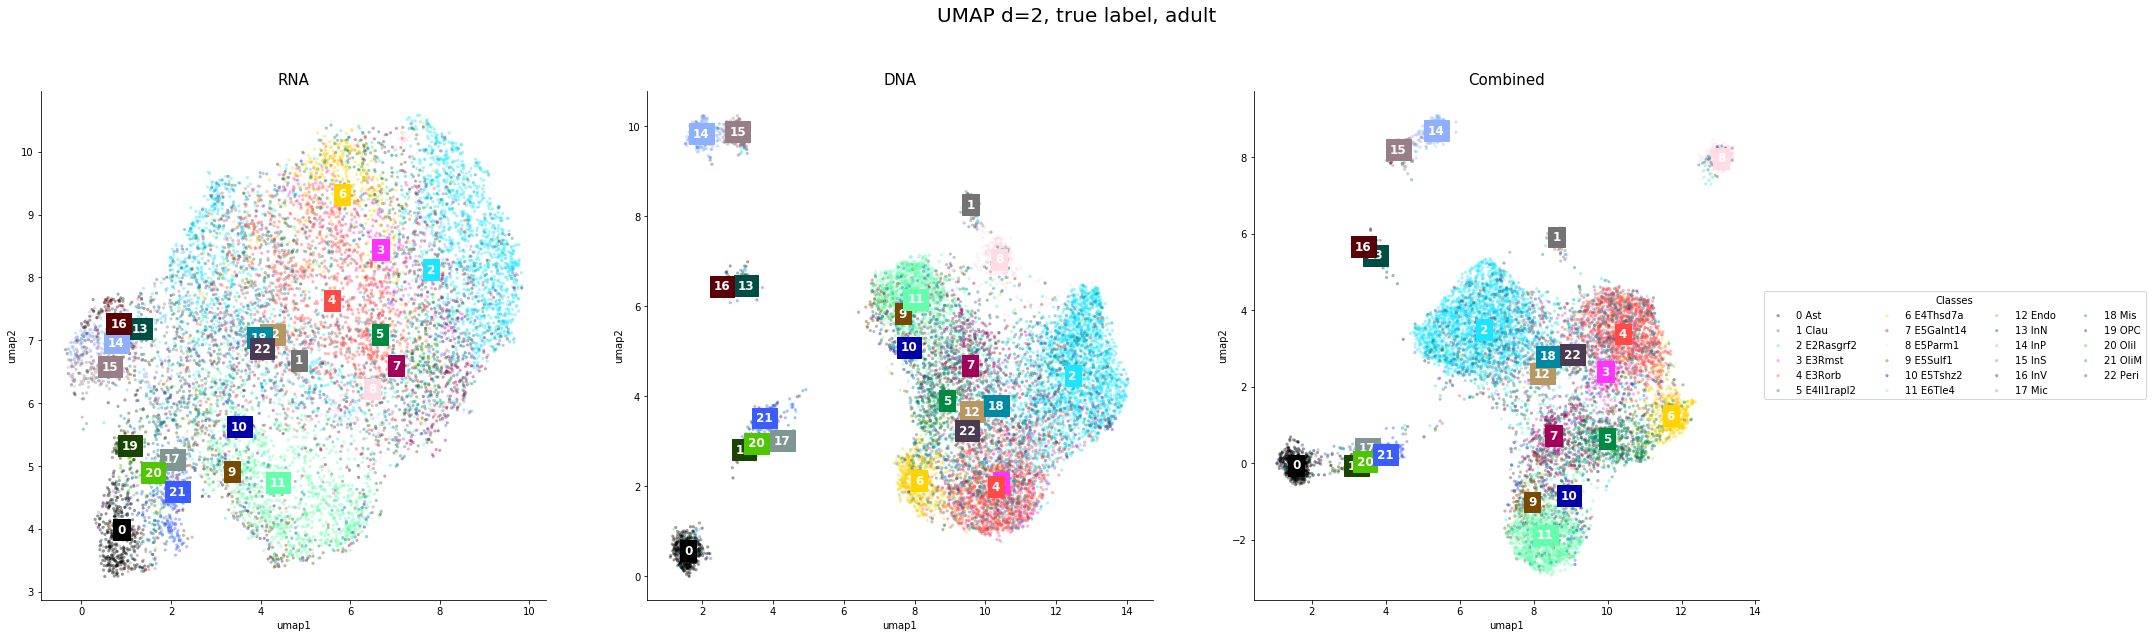

In [16]:
rna_umap2_concat = umap_concat(rna_umap2, rna_cell_df2)
dna_umap2_concat = umap_concat(dna_umap2, dna_cell_df2)
merge_umap2_concat = umap_concat(merge_umap2, merge_cell_df2)

fig, axes = plt.subplots(1, 3, figsize=(30, 9))
fig.suptitle("UMAP d=2, true label, adult", fontsize=20)
vis2d_label(axes[0], rna_umap2_concat, title="RNA", xlab="umap1", ylab="umap2", legend=False)
vis2d_label(axes[1], dna_umap2_concat, title="DNA", xlab="umap1", ylab="umap2", legend=False)
vis2d_label(axes[2], merge_umap2_concat, title="Combined", xlab="umap1", ylab="umap2")
fig.tight_layout()
fig.subplots_adjust(top=0.85, wspace=0.2)

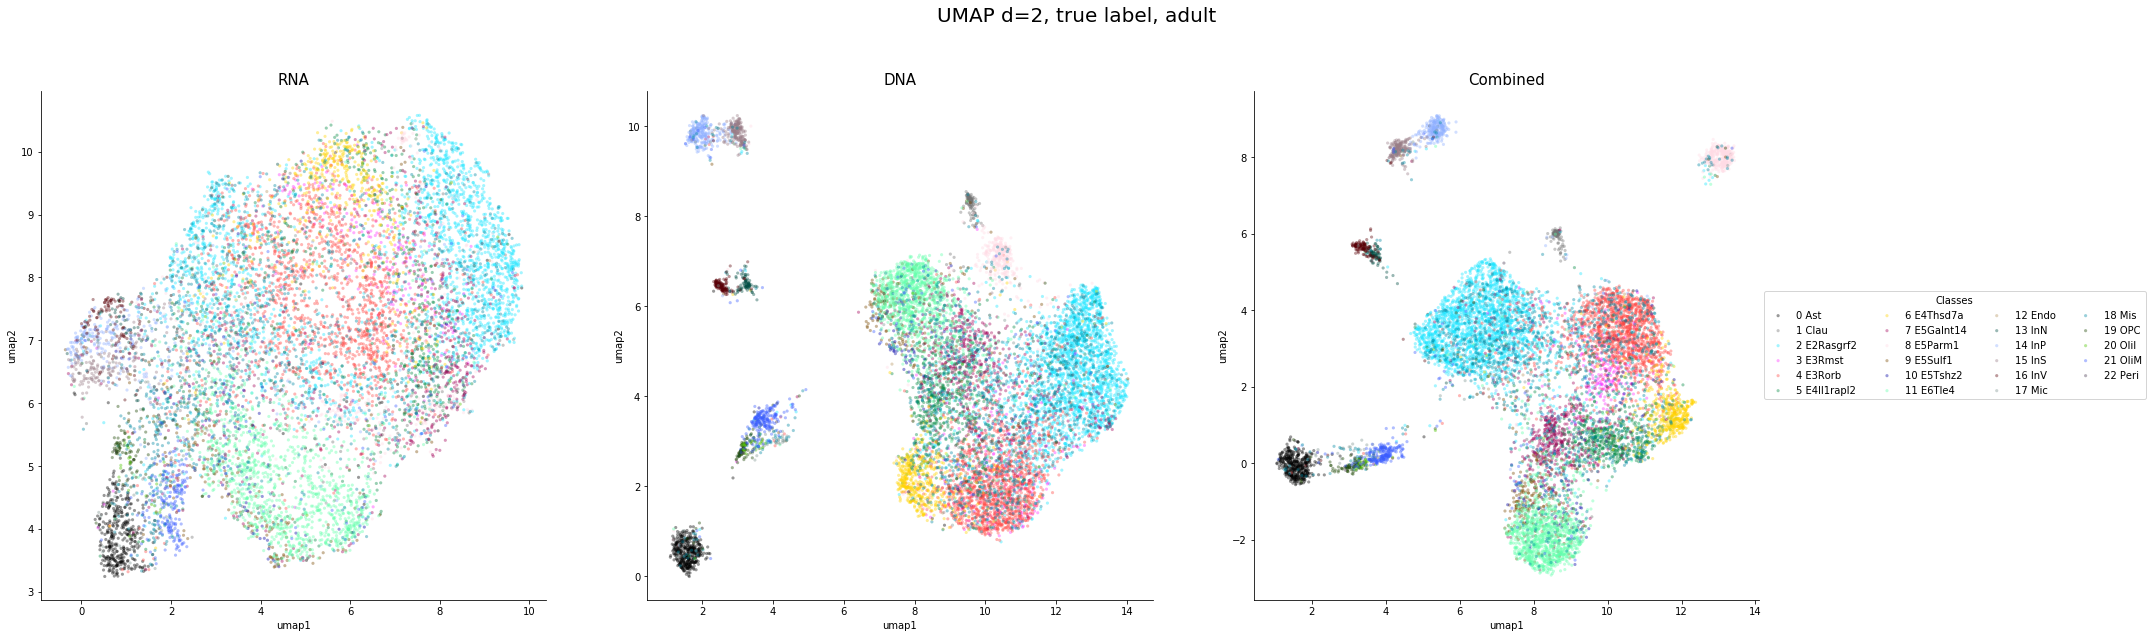

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(30, 9))
fig.suptitle("UMAP d=2, true label, adult", fontsize=20)
vis2d_label(axes[0], rna_umap2_concat, title="RNA", xlab="umap1", ylab="umap2", legend=False, annot=False)
vis2d_label(axes[1], dna_umap2_concat, title="DNA", xlab="umap1", ylab="umap2", legend=False, annot=False)
vis2d_label(axes[2], merge_umap2_concat, title="Combined", xlab="umap1", ylab="umap2", annot=False)
fig.tight_layout()
fig.subplots_adjust(top=0.85, wspace=0.2)

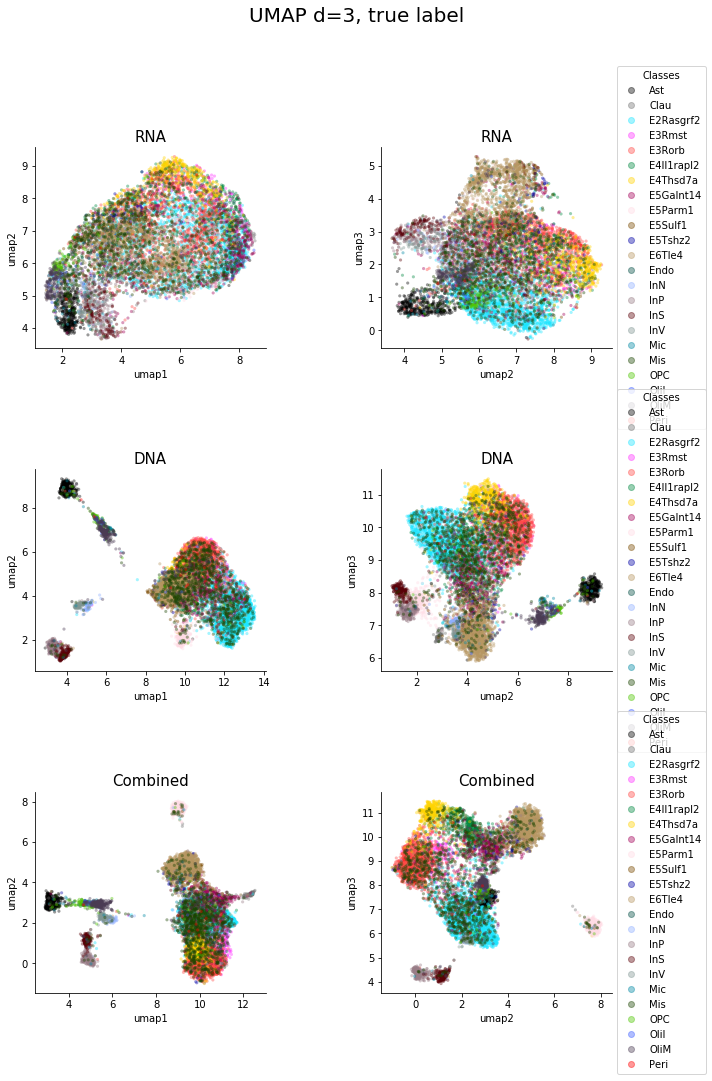

In [29]:
fig, axes = plt.subplots(3, 2, figsize=(10,15))
fig.suptitle("UMAP d=3, true label", fontsize=20)
vis2d(axes[0, 0], rna_umap3[:,0], rna_umap3[:,1], rna_cell_df2["label"], title="RNA", xlab="umap1", ylab="umap2", legend=False)
vis2d(axes[0, 1], rna_umap3[:,1], rna_umap3[:,2], rna_cell_df2["label"], title="RNA", xlab="umap2", ylab="umap3")
vis2d(axes[1, 0], dna_umap3[:,0], dna_umap3[:,1], dna_cell_df2["label"], title="DNA", xlab="umap1", ylab="umap2", legend=False)
vis2d(axes[1, 1], dna_umap3[:,1], dna_umap3[:,2], dna_cell_df2["label"], title="DNA", xlab="umap2", ylab="umap3")
vis2d(axes[2, 0], merge_umap3[:,0], merge_umap3[:,1], merge_cell_df2["label"], title="Combined", xlab="umap1", ylab="umap2", legend=False)
vis2d(axes[2, 1], merge_umap3[:,1], merge_umap3[:,2], merge_cell_df2["label"], title="Combined", xlab="umap2", ylab="umap3")
# vis2d(ax2, dna_umap, dna_cell_df2["label"], title="DNA")
# vis2d(ax3, merge_umap, merge_cell_df2["label"], title="Combined")
fig.tight_layout()
fig.subplots_adjust(top=0.85, wspace=0.5)

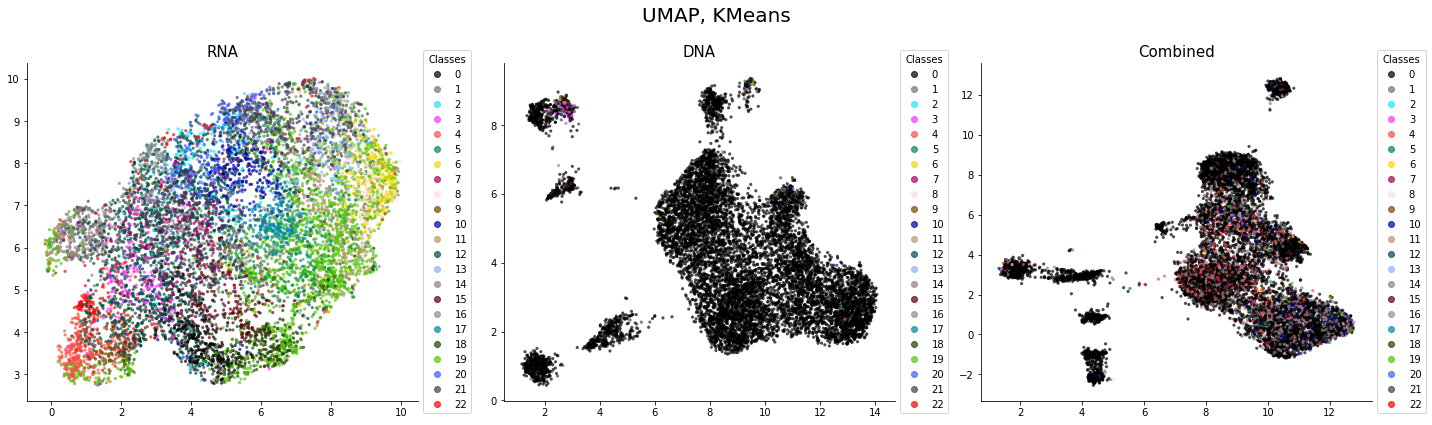

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle("UMAP, KMeans", fontsize=20)
ax1 = axes[0]
vis2d(ax1, rna_umap[:,0], rna_umap[:,1], y_kmeans_rna, list(np.unique(y_kmeans_rna)), title="RNA")
ax2 = axes[1]
vis2d(ax2, dna_umap, y_kmeans_dna, list(np.unique(y_kmeans_dna)), title="DNA")
ax3 = axes[2]
vis2d(ax3, merge_umap, y_kmeans_merge, list(np.unique(y_kmeans_merge)), title="Combined")
fig.tight_layout()
fig.subplots_adjust(top=0.85)

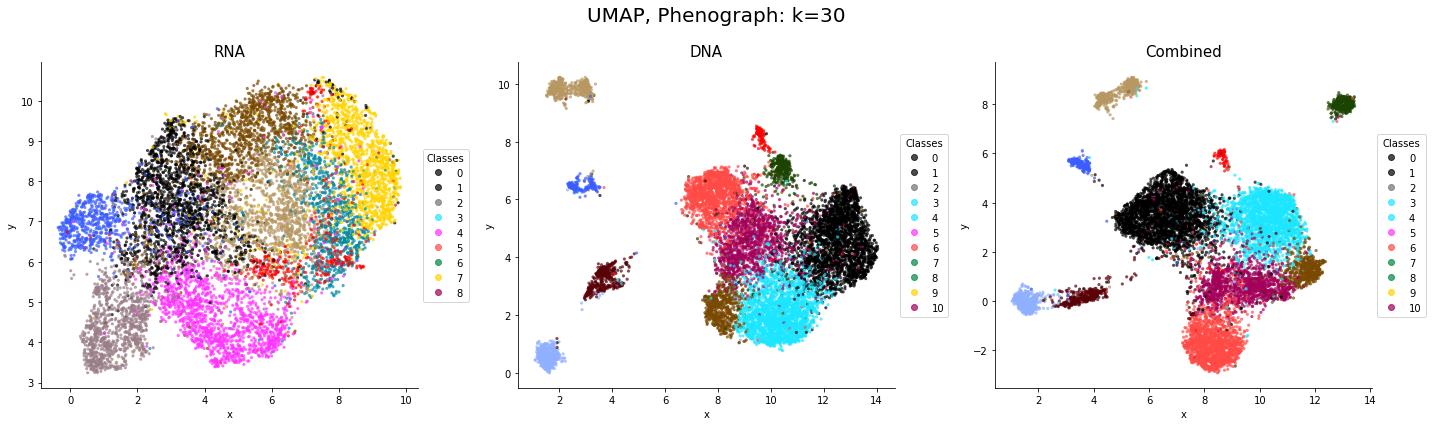

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle("UMAP, Phenograph: k=30", fontsize=20)
ax1 = axes[0]
vis2d(ax1,  rna_umap2[:,0], rna_umap2[:,1], communities_rna, list(np.unique(communities_rna)), title="RNA")
ax2 = axes[1]
vis2d(ax2, dna_umap2[:,0], dna_umap2[:, 1], communities_dna, list(np.unique(communities_dna)), title="DNA")
ax3 = axes[2]
vis2d(ax3, merge_umap2[:,0], merge_umap2[:,1], communities_merge, list(np.unique(communities_merge)), title="Combined")
fig.tight_layout()
fig.subplots_adjust(top=0.85)

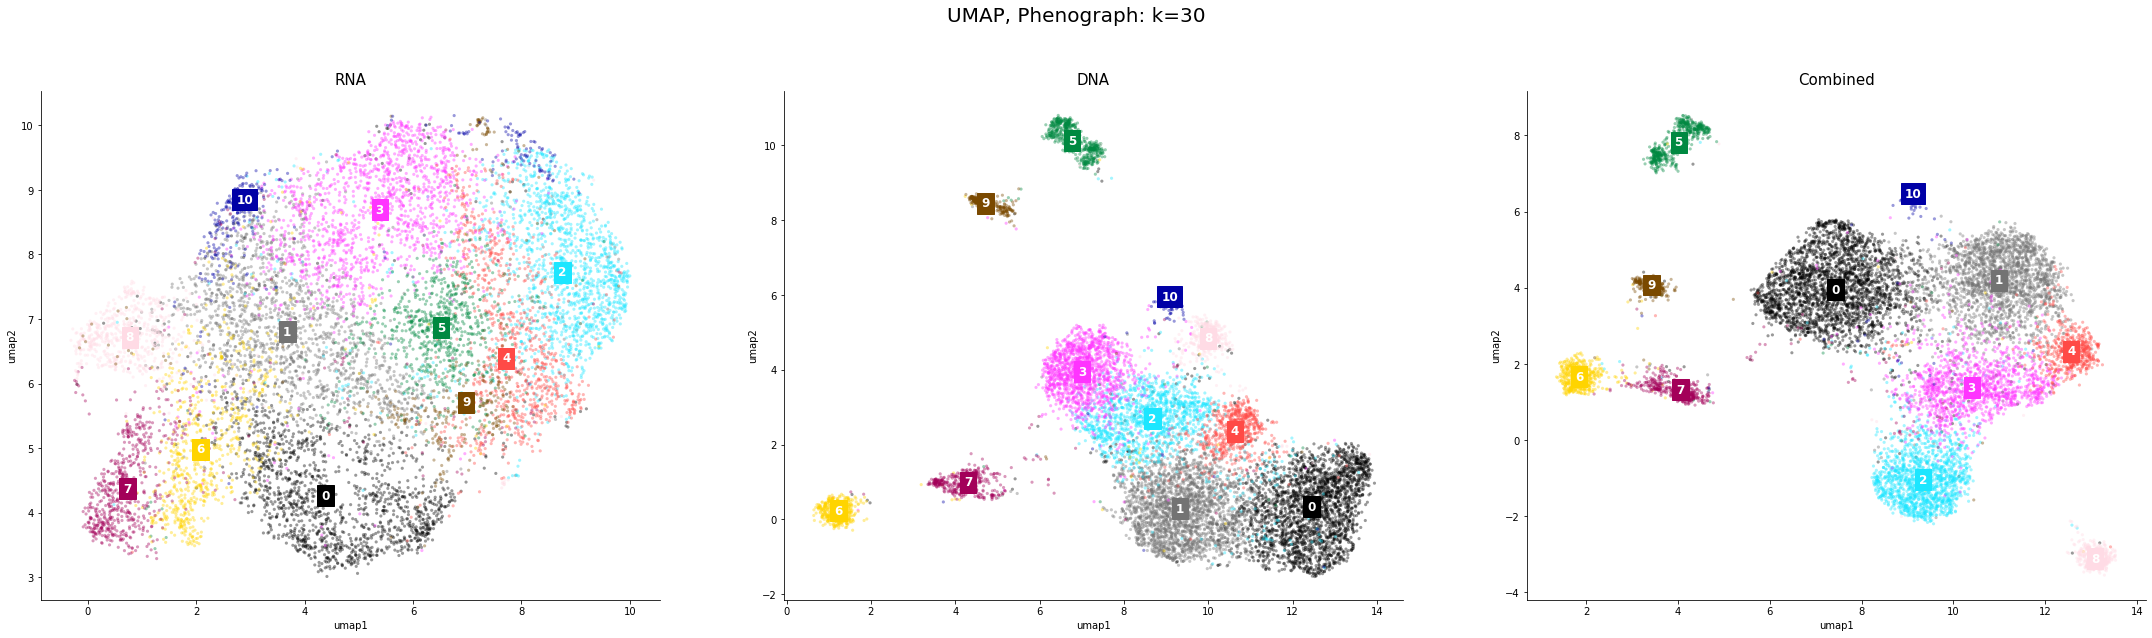

In [37]:
rna_umap2_pheno_concat = umap_concat(rna_umap2, pd.DataFrame(communities_rna, columns=['label']), true_label=False)
dna_umap2_pheno_concat = umap_concat(dna_umap2, pd.DataFrame(communities_dna, columns=['label']), true_label=False)
merge_umap2_pheno_concat = umap_concat(merge_umap2, pd.DataFrame(communities_merge, columns=['label']), true_label=False)

fig, axes = plt.subplots(1, 3, figsize=(30,9))
fig.suptitle("UMAP, Phenograph: k=30, adult mouse brain cortex", fontsize=20)
labels = list(np.unique(communities_rna))
vis2d_label(axes[0], rna_umap2_pheno_concat, labels=labels, title="RNA", xlab="umap1", ylab="umap2", legend=False)
vis2d_label(axes[1], dna_umap2_pheno_concat, labels=labels, title="DNA", xlab="umap1", ylab="umap2", legend=False)
vis2d_label(axes[2], merge_umap2_pheno_concat, labels=labels, title="Combined", xlab="umap1", ylab="umap2", legend=False)
fig.tight_layout()
fig.subplots_adjust(top=0.85, wspace=0.2)

# Similarity Heatmap

In [38]:
from scipy.spatial import distance
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [39]:
rna_gene_df = rna_df[rna_df.index.str.startswith("#") == False]
print(rna_gene_df.shape, rna_cell_df.shape)
rna_cell_df2_sorted = rna_cell_df2.sort_values(by='label')
rna_cell_df2_sorted = rna_cell_df2_sorted.dropna()
check_sanity(rna_cell_df2_sorted)
rna_cell_df2_sorted.head()

(25398, 15) (10309, 15)
shape of data is (10309, 19)
columns that have missing values include Index([], dtype='object')


dim1      dim2      dim3      dim4      dim5      dim6  \
names                                                                           
#09B_AGCGAGGCATGC -0.082681  0.075675  0.174709 -0.026286  0.062392 -0.198192   
#09K_GATGACATCAGC  0.012814  0.082992 -0.021758 -0.032582 -0.024938 -0.005505   
#09K_GGTCCACGGACT -0.117421 -0.003800 -0.105148  0.150670 -0.089703 -0.011244   
#09G_TAGGTCCGCCAG  0.003127  0.047360  0.050098  0.042981  0.010448 -0.026860   
#09D_TCTATCTGAGAC -0.087014 -0.141968 -0.217995 -0.126891  0.158688  0.071783   

                       dim7      dim8      dim9     dim10     dim11     dim12  \
names                                                                           
#09B_AGCGAGGCATGC  0.012409  0.039888 -0.011499 -0.105841  0.008133  0.050218   
#09K_GATGACATCAGC  0.050866 -0.028717  0.020804 -0.074541  0.081693  0.026183   
#09K_GGTCCACGGACT  0.000904  0.129848  0.250540 -0.121922  0.129956 -0.047263   
#09G_TAGGTCCGCCAG  0.002177 -0.003125 -0.006614 -0.016034  0.019239  0.009999   
#09D_TCTATCTGAGAC  0.278340 -0.256505  0.019167 -0.062963  0.226878 -0.286895   

                      dim13     dim14     dim15 Batch       Barcode Ident  \
names                                                                       
#09B_AGCGAGGCATGC -0.014860  0.191218 -0.155918   09B  AGCGAGGCATGC   Ast   
#09K_GATGACATCAGC -0.049108  0.106982  0.005357   09K  GATGACATCAGC   Ast   
#09K_GGTCCACGGACT  0.059672  0.048023  0.118576   09K  GGTCCACGGACT   Ast   
#09G_TAGGTCCGCCAG -0.015556  0.056117 -0.015985   09G  TAGGTCCGCCAG   Ast   
#09D_TCTATCTGAGAC -0.026930 -0.007366 -0.002258   09D  TCTATCTGAGAC   Ast   

                   label  
names                     
#09B_AGCGAGGCATGC      0  
#09K_GATGACATCAGC      0  
#09K_GGTCCACGGACT      0  
#09G_TAGGTCCGCCAG      0  
#09D_TCTATCTGAGAC      0

In [40]:
diff_expr_df = pd.read_table("./data/diff_expr.txt")
diff_expr_df.head()

p_val  avg_logFC  pct.1  pct.2      p_val_adj cluster    gene
Rorb     0.000000e+00   1.327445  0.684  0.218   0.000000e+00  E3Rorb    Rorb
Hs6st3  2.345749e-223   0.778507  0.910  0.627  5.958906e-219  E3Rorb  Hs6st3
Zmat4   2.676550e-200   1.028418  0.577  0.236  6.799241e-196  E3Rorb   Zmat4
Ptprd   5.213559e-192   0.406770  0.997  0.970  1.324400e-187  E3Rorb   Ptprd
Brinp3  7.946185e-187   0.902808  0.715  0.374  2.018569e-182  E3Rorb  Brinp3

In [41]:
def gene_df_cleaning(df, pval_cutoff=0.05, marker_per_cluster=10):
    df = df[df.p_val_adj<=pval_cutoff]
    # sort p value ascending and group by its cluster 
    df = df.sort_values(['cluster','p_val_adj'])
    df = df.groupby('cluster').head(marker_per_cluster)
    return pd.DataFrame(df.cluster)

In [42]:
markers_df = gene_df_cleaning(diff_expr_df, 0.01)
markers_df = markers_df.join(rna_gene_df)
markers_df = markers_df.dropna()
check_sanity(markers_df)

shape of data is (122, 16)
columns that have missing values include Index([], dtype='object')


In [19]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(markers_df.iloc[:,:5])

              cluster      dim1      dim2      dim3      dim4
Atp1a2            Ast  0.245065  0.460942  0.076829 -0.249077
Slc1a3            Ast -0.029257  0.407842 -0.010885  0.245955
Gpc5              Ast -0.220336  0.369450  0.116333  0.065871
Ntsr2             Ast  0.337173  0.265468  0.303227  0.125484
Ppap2b            Ast -0.192654  0.249149  0.422218  0.079768
Bcan              Ast -0.042980  0.470491  0.049662 -0.014879
Prex2             Ast -0.164521  0.017308  0.273444  0.154657
Ptprz1            Ast -0.189234  0.385112  0.069321  0.178842
Mt1               Ast  0.179132  0.381204  0.294991  0.030701
Apoe              Ast  0.304436  0.548662  0.355216 -0.231115
Gnb4             Clau  0.069662  0.167285 -0.218317 -0.483296
Rgs12            Clau  0.114383  0.152602 -0.247471 -0.343067
Col24a1          Clau  0.373372 -0.018207 -0.475141 -0.260533
Rgs6        E2Rasgrf2  0.019363 -0.243357  0.122413  0.092742
Cpne6       E2Rasgrf2  0.011575 -0.231060  0.416006  0.170455
Calb1   

In [33]:
# from itertools import groupby

# xticklab = [x for k, v in groupby(list(rna_cell_df2_sorted.Ident)) for x in [k] + [' '] * (sum(1 for __ in v))]
# xticklab[:10]

['Ast', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']

Text(0.5, 0.98, 'Cosine Similarity between Genes and Cells')

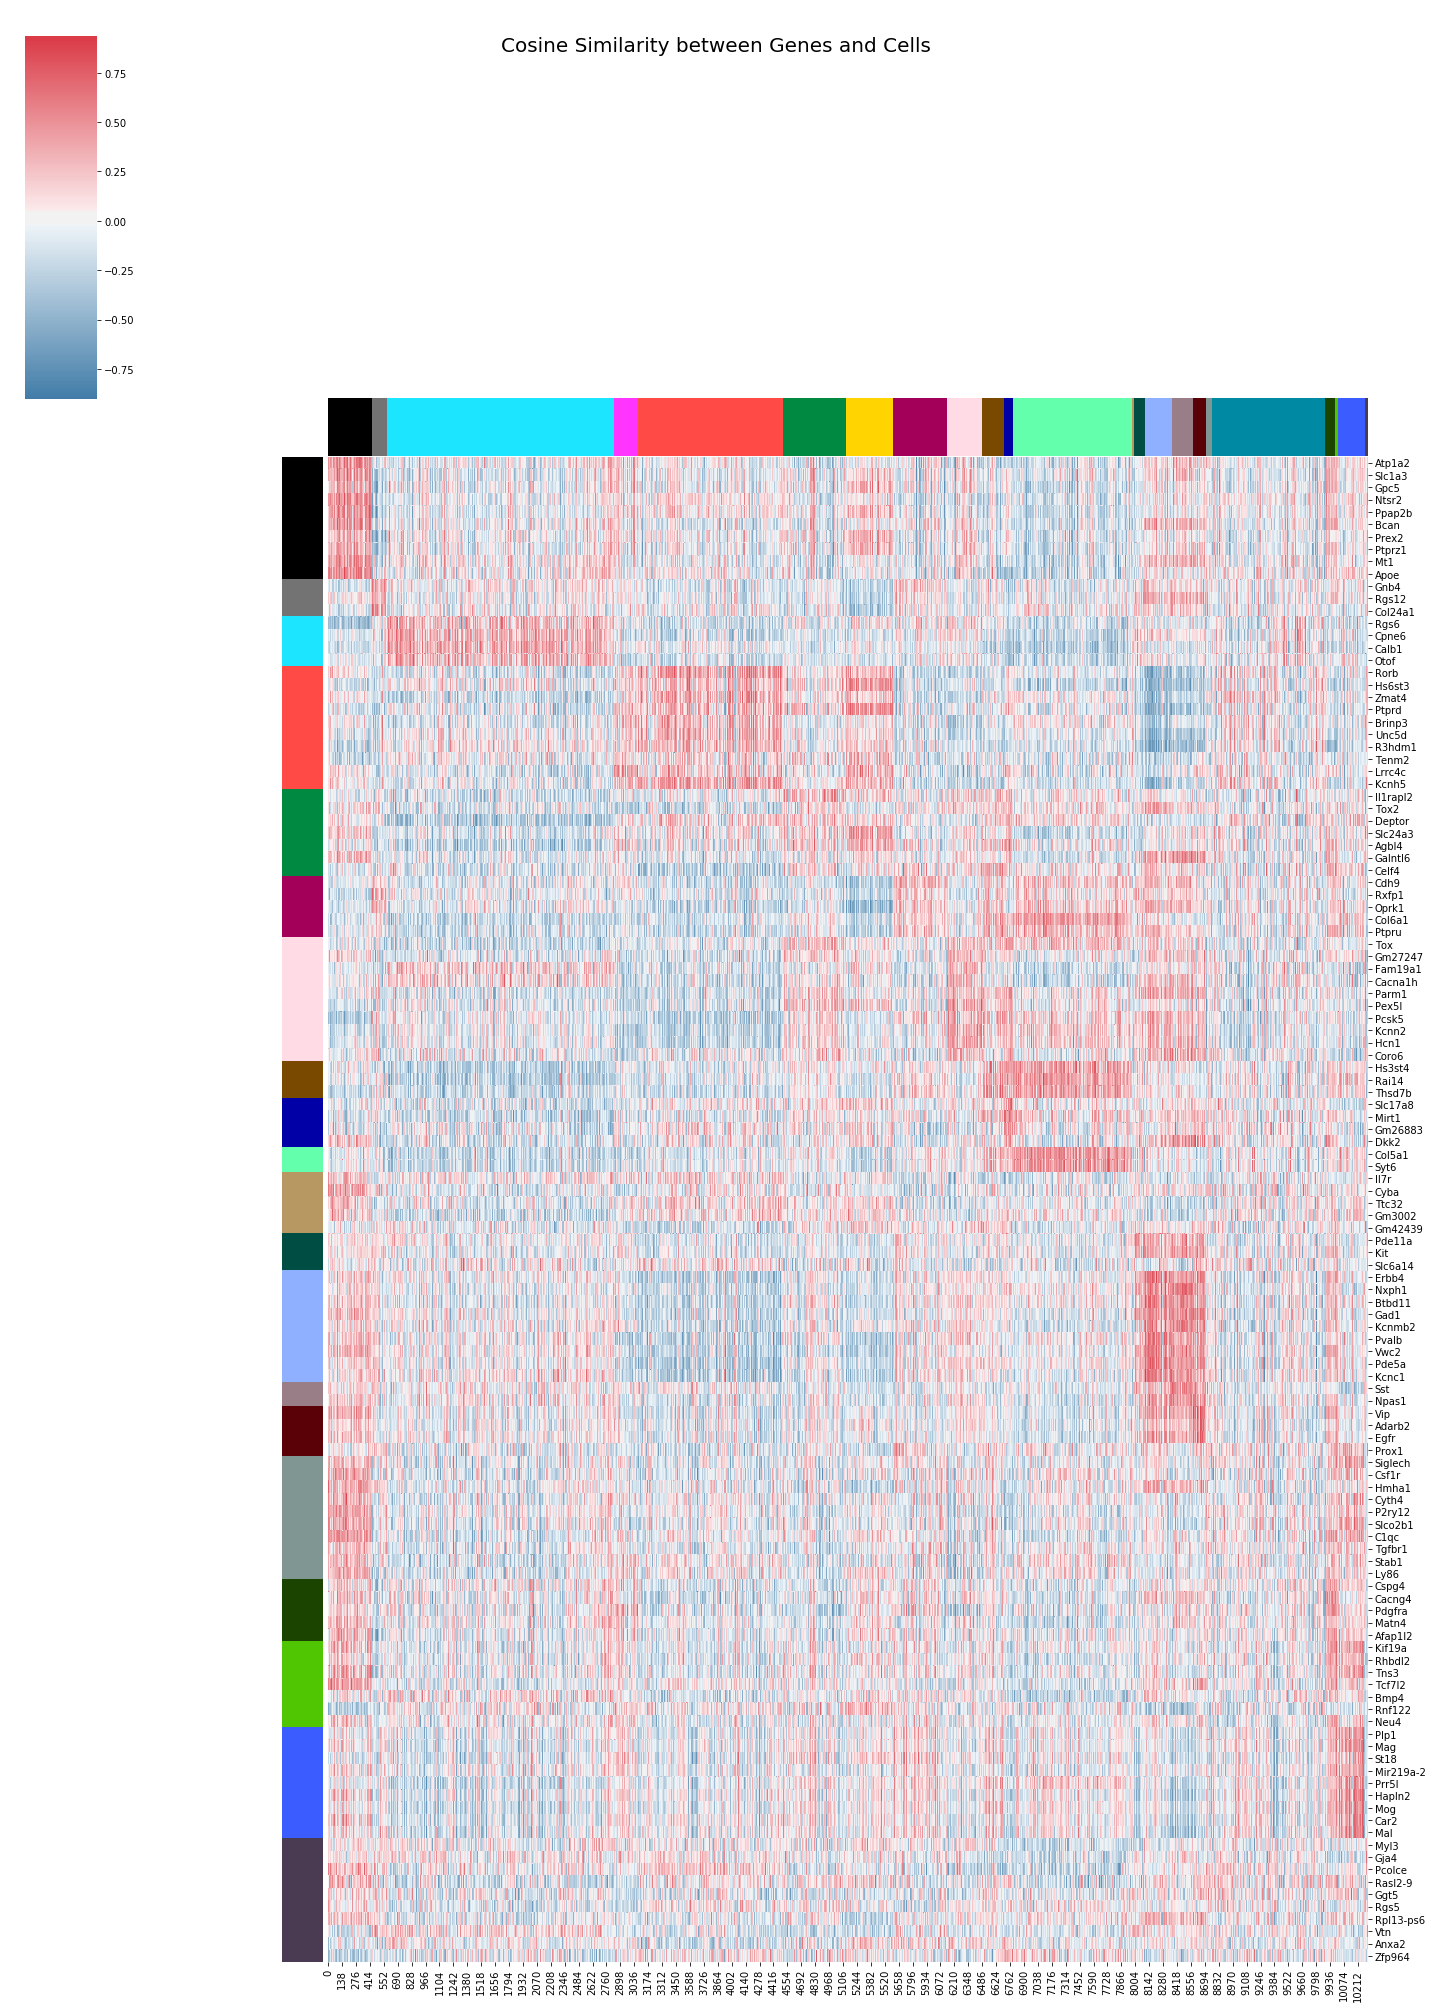

In [43]:
gene_to_cell = distance.cdist(markers_df.iloc[:,1:], rna_cell_df2_sorted.iloc[:,:-4], 'cosine')
gene_to_cell_df = 1 - pd.DataFrame(gene_to_cell)
lut = dict(zip(pd.Series(le.classes_).unique(), color24[:-1]))
row_colors = list(markers_df.cluster.map(lut))
col_colors = list(rna_cell_df2_sorted["Ident"].map(lut))
g = sns.clustermap(gene_to_cell_df, metric="cosine", row_colors=row_colors, col_colors=col_colors, row_cluster=False, col_cluster=False, 
                   figsize=(20, 28), cbar_kws={"shrink": .9}, cmap=sns.diverging_palette(240,10,as_cmap=True), 
                   xticklabels='auto', yticklabels=markers_df.index)
g.fig.suptitle("Cosine Similarity between Genes and Cells", fontsize=20)

C:\Users\CSY\anaconda3\lib\site-packages\seaborn\matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, 0.98, 'Cosine Distance between Genes and Cells')

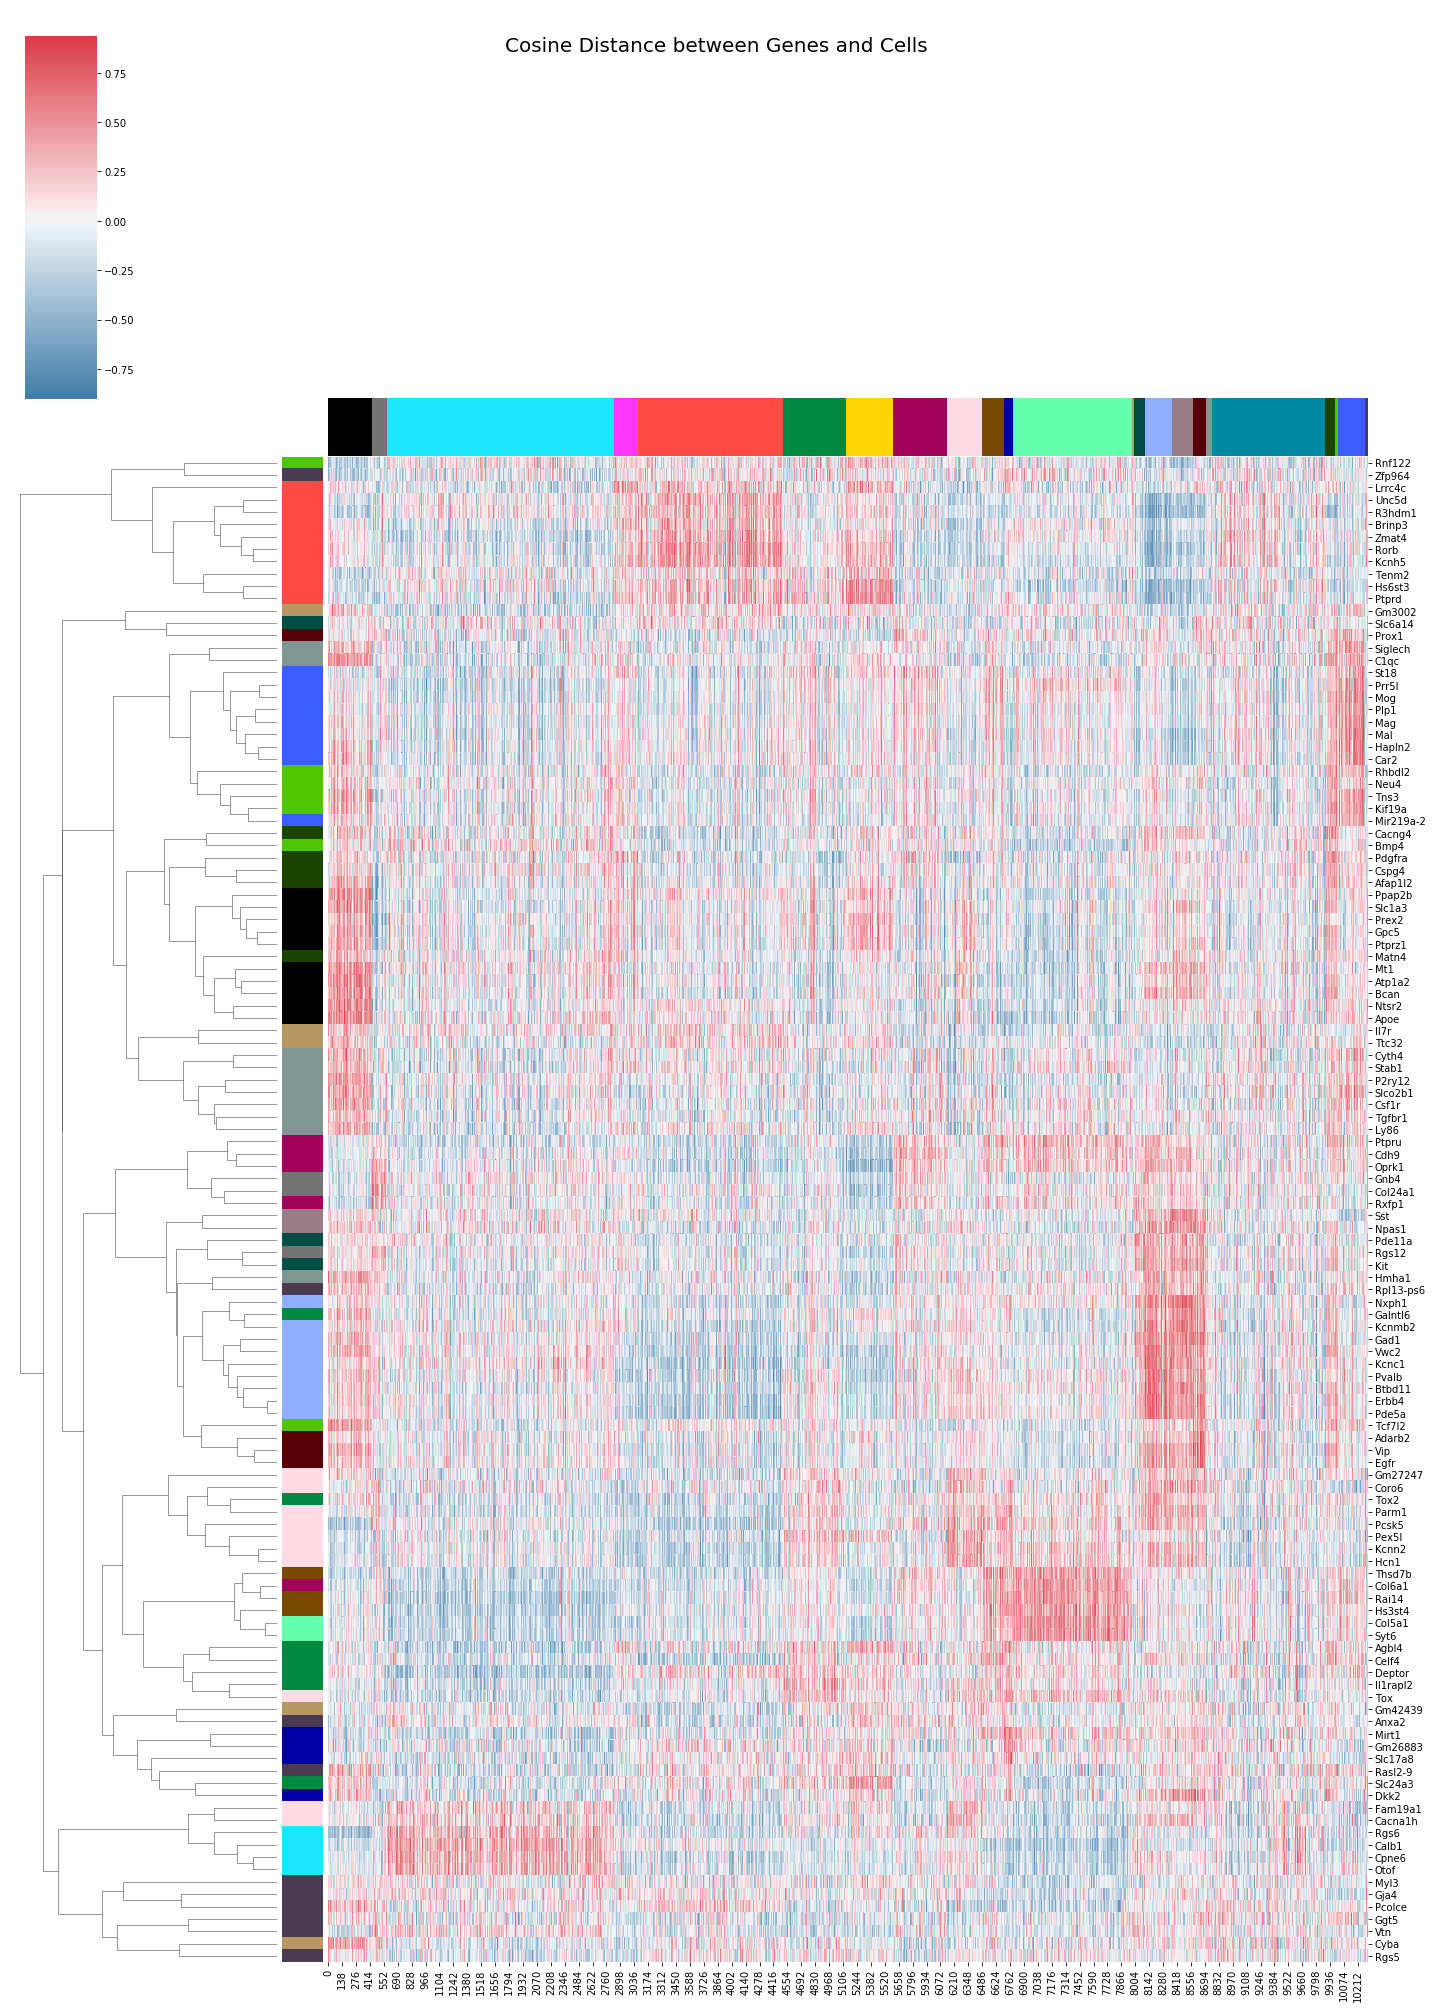

In [44]:
gene_to_cell = distance.cdist(markers_df.iloc[:,1:], rna_cell_df2_sorted.iloc[:,:-4], 'cosine')
gene_to_cell_df = 1 - pd.DataFrame(gene_to_cell)
lut = dict(zip(pd.Series(le.classes_).unique(), color24[:-1]))
row_colors = list(markers_df.cluster.map(lut))
col_colors = list(rna_cell_df2_sorted["Ident"].map(lut))
g = sns.clustermap(gene_to_cell_df, metric="cosine", row_colors=row_colors, col_colors=col_colors, row_cluster=True, col_cluster=False, 
                   figsize=(20, 28), cbar_kws={"shrink": .9}, cmap=sns.diverging_palette(240,10,as_cmap=True), 
                   xticklabels='auto', yticklabels=markers_df.index)
g.fig.suptitle("Cosine Distance between Genes and Cells", fontsize=20)

In [ ]:
# a = np.random.rand(23)/23
# size= 200
# all_classes = ['E6Tle4', 'E2Rasgrf2', 'InV', 'E4Thsd7a', 'E3Rmst', 'E3Rorb','E5Galnt14', 'Clau', 'E4Il1rapl2', 'E5Parm1', 'OPC', 'Mis', 'E5Sulf1', 'Ast', 'OliM', 'E5Tshz2', 'InS', 'InN', 'InP', 'OliI', 'Endo', 'Mic', 'Peri']
# df = pd.DataFrame(
#     {'x': np.random.rand(size),
#     'y': np.random.rand(size),
#      'z': np.random.rand(size),
#      'classes': np.random.choice(all_classes, size, p=a/sum(a))
#     })
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df["label"] = le.fit_transform(df["classes"])
# df = df.sort_values('classes')

In [ ]:
# size= 2000
# df2 = pd.DataFrame(
#     {'x': np.random.rand(size),
#     'y': np.random.rand(size),
#      'z': np.random.rand(size),
#      'classes': np.random.choice(all_classes, size, p=a/sum(a))
#     })
# df2 = df2.sort_values('classes')

In [ ]:
# lut = dict(zip(df.classes.unique(), color24[:-1]))
# row_colors = df.classes.map(lut)
# col_colors = df2.classes.map(lut)
# matrix = distance.cdist(df.iloc[:,:3], df2.iloc[:,:3], 'cosine')
# # matrix
# g = sns.clustermap(pd.DataFrame(matrix), metric="cosine", row_colors=row_colors, col_colors=col_colors, figsize=(20, 10),
#                     cbar_kws={"shrink": .9}, cmap=sns.diverging_palette(240,10,as_cmap=True))
# g.fig.suptitle("Cosine Distance between Genes and Cells", fontsize=20)

In [ ]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[6, 3])

# axins1 = inset_axes(ax1,
#                     width="50%",  # width = 50% of parent_bbox width
#                     height="5%",  # height : 5%
#                     loc='upper right')

# im1 = ax1.imshow([[1, 2], [2, 3]])
# fig.colorbar(im1, cax=axins1, orientation="horizontal", ticks=[1, 2, 3])
# axins1.xaxis.set_ticks_position("bottom")

# axins = inset_axes(ax2,
#                    width="5%",  # width = 5% of parent_bbox width
#                    height="50%",  # height : 50%
#                    loc='lower left',
#                    bbox_to_anchor=(1.05, 0., 1, 1),
#                    bbox_transform=ax2.transAxes,
#                    borderpad=0,
#                    )

In [ ]:
# f, ax  = plt.subplots(1, figsize=(40, 6))
# gene_to_cell_df = pd.DataFrame(gene_to_cell)
# im = sns.heatmap(gene_to_cell_df, cmap=sns.diverging_palette(240,10,as_cmap=True),
#             square=True, ax=ax, cbar=True, cbar_kws={"shrink": .9})
# ax.set_title("Cosine Distance between Genes and Cells", fontsize=20)
# f.tight_layout()

In [ ]:
# grid_kws = {"height_ratios": (.1, .005), "hspace": .25}
# f, (ax, cbar_ax) = plt.subplots(1, figsize=(50, 5), gridspec_kw=grid_kws)
# gene_to_cell_df = pd.DataFrame(gene_to_cell)
# sns.heatmap(gene_to_cell_df, cmap=sns.diverging_palette(240,10,as_cmap=True),
#             square=True, ax=ax, cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal"})
# ax.set_title("Cosine Distance between Genes and Cells", fontsize=20)
# f.tight_layout()
# # ax.set_xticklabels(list(taxa.FieldID))
# # ax.set_ylabel("Field ID", fontsize=15)